In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")



Library


In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error

#from catboost import CatBoostClassifier

In [3]:
veri=pd.read_csv("hmelq.csv")

In [4]:
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
dms=pd.get_dummies(veri[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [6]:
n_veri = veri.drop(["reason","job"],axis=1)
n_veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [7]:
veri = pd.concat([n_veri, dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
veri=veri.dropna()
veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,0,81200,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0,1,0,0,0,0,0,0
1,0,12600,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0,0,0,0,0,0,0
2,0,18000,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0,0,0,0,0,0,0
3,0,10300,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,1,0,0,0,0,0,0,0
4,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,1,0,0,0,0,0,0,0


In [8]:
y=veri["bad"]
X=veri.drop(["bad"],axis=1)
X=pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 18)
(632, 18)
(1473,)
(632,)


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
cart=DecisionTreeClassifier()#hedef değişken kategorik
cart_model=cart.fit(X_train,y_train)
cart_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

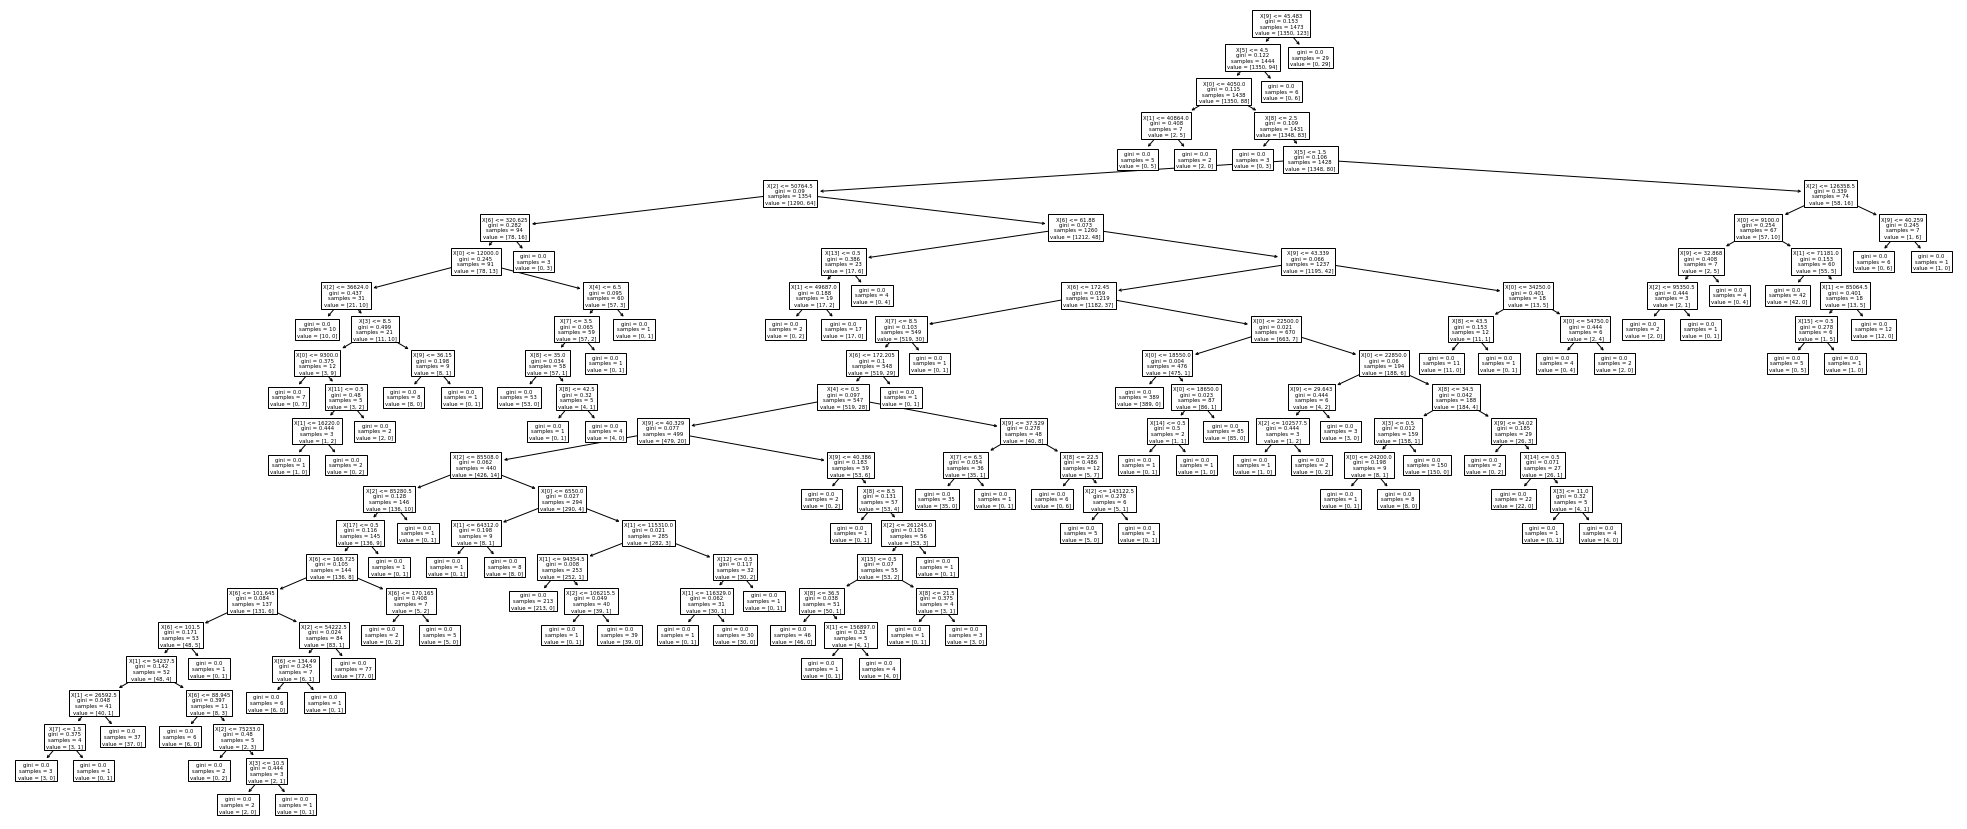

In [27]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [28]:
y.mean()

0.08598574821852732

In [14]:
cart_model.predict(X_test)[0:5]

array([0, 0, 0, 1, 0])

In [15]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.26978660108793817

In [48]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)



0.9272151898734177

In [49]:
print(classification_report(y_test,y_pred))#default parametrelerle kurulan modelimizin basarisini inceleriz;

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       574
           1       0.62      0.55      0.58        58

    accuracy                           0.93       632
   macro avg       0.79      0.76      0.77       632
weighted avg       0.92      0.93      0.93       632



# 1.1) Decision Tree Model Tuning


In [19]:
?cart_model

In [20]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}
#max_Depth:ne kadar derinlikte olsun
#min_samples_split:yapragı bölerken en az kaça böliyim datayi bilgisidir.

In [82]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=1)
cart_cv_model=cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4192 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.7s finished


In [83]:
#En iyi parametreleri alalım
print("En iyi paramatreler: " + str(cart_cv_model.best_params_)) #en iyilerini bul

En iyi paramatreler: {'max_depth': 9, 'min_samples_split': 3}


In [9]:
cart = tree.DecisionTreeClassifier(max_depth=9, min_samples_split=3)
cart_tuned=cart.fit(X_train, y_train)

In [10]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9335443037974683

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2547026064285935

In [87]:
print(classification_report(y_test,y_pred))
#en iyi parametrelerle kurulan modelimizin basarisini inceleriz;
#0 lar icin recall ve f1 score iyilesmis
#1ler icin precision ve f1 score degeri ciddi oranda iyilesmistir

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       574
           1       0.81      0.38      0.52        58

    accuracy                           0.94       632
   macro avg       0.88      0.69      0.74       632
weighted avg       0.93      0.94      0.92       632





Precision: 1 için iyileşmiş Recall : 0 için iyileşmiş, 1 için düşmüştür f1-score : 0 için iyileşmiş, 1 için düşmüştür Accuracy : iyileşmiştir


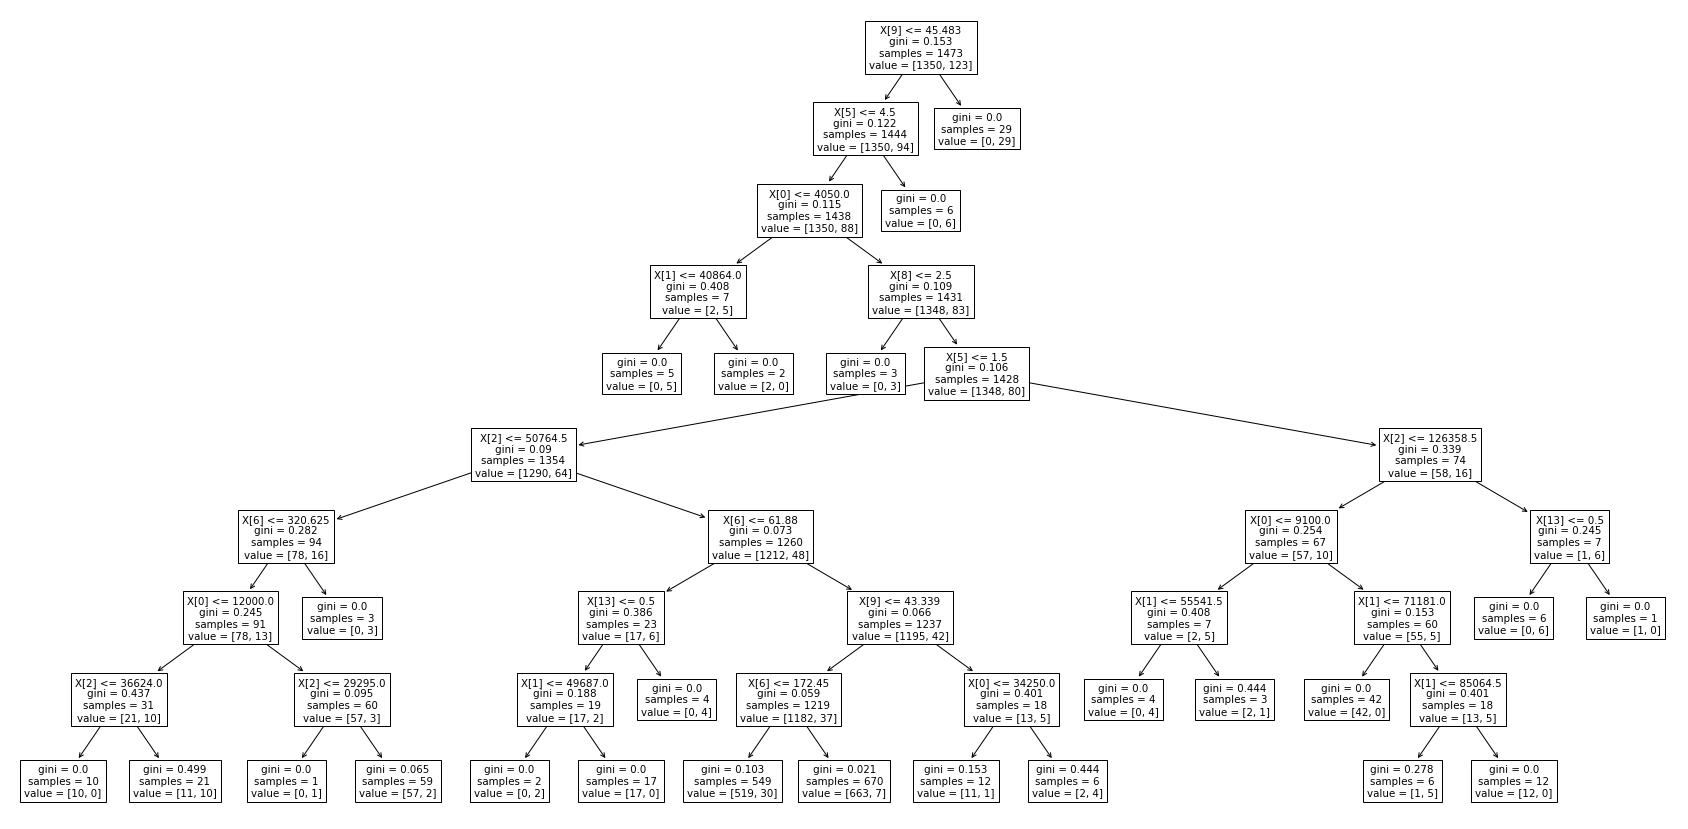

In [57]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# RESULTS BEFORE THE TUNE

In [18]:
modeller = [
    cart_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
DecisionTreeClassifier:
Accuracy: 92.7215%


# RESULTS AFTER THE TUNE

In [19]:
modeller = [
    cart_tuned
   
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
DecisionTreeClassifier:
Accuracy: 93.3544%
